# Proyecto práctico: árbol de decisión y random forest con scikit-learn

In [1]:
#Importamos las librerías principales
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 

Utilizaremos el **Car Evaluation Data Set** de Kaggle: https://www.kaggle.com/datasets/elikplim/car-evaluation-data-set

In [2]:
#Cargamos dataset a utilizar
df = pd.read_csv('../Data/car_evaluation.csv', header=None)

## Análisis exploratorio de datos

In [3]:
#Visualización del dataframe
df.head(10)

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
5,vhigh,vhigh,2,2,med,high,unacc
6,vhigh,vhigh,2,2,big,low,unacc
7,vhigh,vhigh,2,2,big,med,unacc
8,vhigh,vhigh,2,2,big,high,unacc
9,vhigh,vhigh,2,4,small,low,unacc


In [4]:
#Analizamos el shape del objeto
df.shape

(1728, 7)

In [5]:
#Como podemos observar vamos a renombrar las columnas de manera correcta
df.columns = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

In [6]:
#Verificamos la transformación
df.head(10)

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
5,vhigh,vhigh,2,2,med,high,unacc
6,vhigh,vhigh,2,2,big,low,unacc
7,vhigh,vhigh,2,2,big,med,unacc
8,vhigh,vhigh,2,2,big,high,unacc
9,vhigh,vhigh,2,4,small,low,unacc


In [7]:
#Visualizamos los tipos de datos
df.dtypes

buying      object
maint       object
doors       object
persons     object
lug_boot    object
safety      object
class       object
dtype: object

Primer resumen de los datos:
* Hay 7 variables en el conjunto de datos. Todas las variables son de tipo de datos categóricos.
* Estos se dan por compra, mantenimiento, puertas, personas, lug_boot, seguridad y clase.
* La clase es la variable de destino o target.

In [8]:
# Exploremos un poco mas la variable target
df['class'].value_counts()

unacc    1210
acc       384
good       69
vgood      65
Name: class, dtype: int64

In [9]:
#Verificamos valores missings
df.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

## Procesamiento de datos

In [10]:
#Separamos en X e y
X = df.drop(['class'], axis=1)
y = df['class']

In [11]:
#Importamos las librerías necesarias para la creación del modelo
from sklearn.model_selection import train_test_split

#30% para test y 70% para train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [12]:
#Veamos que obtuvimos
X_train.shape, X_test.shape

((1209, 6), (519, 6))

In [13]:
y_train.shape, y_test.shape

((1209,), (519,))

In [14]:
#Veamos que tenemos. Por ejemplo, en X_train
X_train.head()

,buying,maint,doors,persons,lug_boot,safety
1178,med,med,5more,4,big,high
585,high,high,3,more,small,low
1552,low,med,3,4,med,med
1169,med,med,5more,2,big,high
1033,med,high,4,2,big,med


In [15]:
X_train.dtypes

buying      object
maint       object
doors       object
persons     object
lug_boot    object
safety      object
dtype: object

## Entrenamiento de modelo de clasificación con árbol de decisión

In [16]:
#Importante: todos nuestros tipos de datos son object, realizamos una transformación
import category_encoders as ce

encoder = ce.OrdinalEncoder(cols=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])

X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

In [17]:
#Verificamos la transformación
X_train.head()

,buying,maint,doors,persons,lug_boot,safety
1178,1,1,1,1,1,1
585,2,2,2,2,2,2
1552,3,1,2,1,3,3
1169,1,1,1,3,1,1
1033,1,2,3,3,1,3


In [18]:
#Importar árbol de decisión
from sklearn.tree import DecisionTreeClassifier
#Creación del modelo
tree = DecisionTreeClassifier(max_depth=2, random_state=0)

In [19]:
#Entrenamiento
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=0)

In [21]:
#Calculo de las predicciones en Train y Test
y_train_pred_tree = tree.predict(X_train)
y_test_pred_tree = tree.predict(X_test)

## Evaluación de modelo de clasificación con árbol de decisión

In [22]:
#Calculo de métricas 
from sklearn.metrics import accuracy_score

#Calculo el accuracy en Train
train_accuracy_tree = accuracy_score(y_train, y_train_pred_tree)

#Calculo el accuracy en Test
test_accuracy_tree = accuracy_score(y_test, y_test_pred_tree)

#Imprimo los resultados
print(f'''
Train Accuracy: {train_accuracy_tree}
 Test Accuracy: {test_accuracy_tree}''')


Train Accuracy: 0.7733664185277088
 Test Accuracy: 0.7591522157996147


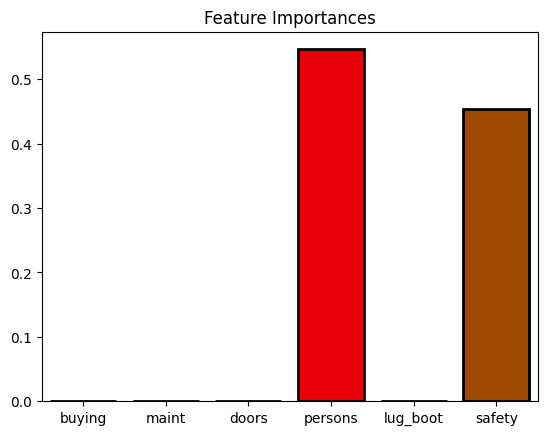

In [23]:
#Verificamos el feature importances
import seaborn as sns
importances = pd.Series(tree.feature_importances_, index=X.columns)
sns.barplot(
    x=importances.index,
    y=importances,
    palette='bright',
    saturation=2,
    edgecolor='black',
    linewidth=2
)
plt.title('Feature Importances');

In [24]:
# Reentrenamos el modelo solo con las variables más importantes
X_train_optimo = X_train[['safety', 'persons']]
X_test_optimo = X_test[['safety', 'persons']]
#Entrenamiento
tree.fit(X_train_optimo, y_train)

#Calculo de las predicciones en Train y Test
y_train_pred_tree_optimo = tree.predict(X_train_optimo)
y_test_pred_tree_optimo = tree.predict(X_test_optimo)

#Calculo del accuracy en Train
train_accuracy_tree_optimo = accuracy_score(y_train, y_train_pred_tree_optimo)

#Calculo del accuracy en Test
test_accuracy_tree_optimo = accuracy_score(y_test, y_test_pred_tree_optimo)

#Imprimo los resultados
print(f'''
Train Accuracy: {train_accuracy_tree_optimo}
 Test Accuracy: {test_accuracy_tree_optimo}''')


Train Accuracy: 0.7733664185277088
 Test Accuracy: 0.7591522157996147


## Entrenamiento de modelo de clasificación con random forest

In [25]:
#Importar random forest
from sklearn.ensemble import RandomForestClassifier

#Creación del modelo
forest = RandomForestClassifier(n_estimators=10, random_state=0)

#Entrenamiento
forest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=0)

In [26]:
#Calculo de las predicciones en Train y Test
y_train_pred_forest = forest.predict(X_train)
y_test_pred_forest = forest.predict(X_test)

## Evaluación de modelo de clasificación con random forest

In [27]:
#Calculo de métricas 
from sklearn.metrics import accuracy_score

#Calculo el accuracy en Train
train_accuracy_forest = accuracy_score(y_train, y_train_pred_forest)

#Calculo el accuracy en Test
test_accuracy_forest = accuracy_score(y_test, y_test_pred_forest)

#Imprimo los resultados
print(f'''
Train Accuracy: {train_accuracy_forest}
 Test Accuracy: {test_accuracy_forest}''')

#Importante: podríamos reducir el numero de estimadores para disminuir el sobreajuste del modelo.


Train Accuracy: 0.9942100909842845
 Test Accuracy: 0.8863198458574181


In [28]:
# Visualización de las feature importantes
feature_scores = pd.Series(forest.feature_importances_, index=X.columns).sort_values(ascending=False)
feature_scores

safety      0.254441
buying      0.226386
persons     0.212589
maint       0.140068
lug_boot    0.090112
doors       0.076404
dtype: float64

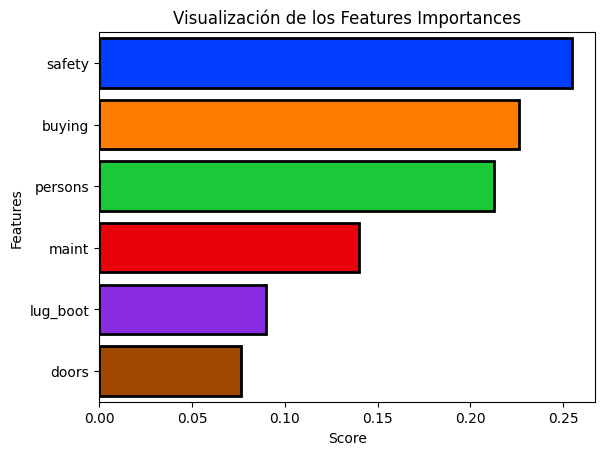

In [29]:
#Gráfico de barras
sns.barplot(
    x=feature_scores,
    y=feature_scores.index,
    palette='bright',
    saturation=2,
    edgecolor='black',
    linewidth=2
)
plt.title('Visualización de los Features Importances')
plt.xlabel('Score')
plt.ylabel('Features');

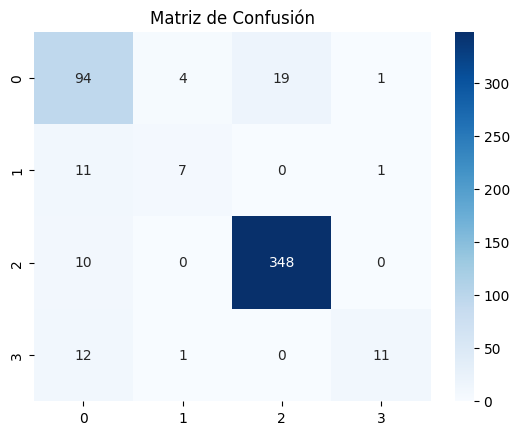

In [30]:
# Matriz de confusion del RF
from sklearn.metrics import confusion_matrix

#Matriz de confusión
cm = confusion_matrix(y_test, y_test_pred_forest)

#Gráfico de la matriz de confusión
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión');

In [33]:
#RF
from sklearn.metrics import classification_report

#Reporte de clasificación
print(classification_report(y_test, y_test_pred_forest))

              precision    recall  f1-score   support

         acc       0.74      0.80      0.77       118
        good       0.58      0.37      0.45        19
       unacc       0.95      0.97      0.96       358
       vgood       0.85      0.46      0.59        24

    accuracy                           0.89       519
   macro avg       0.78      0.65      0.69       519
weighted avg       0.88      0.89      0.88       519

